In [11]:
pip install --upgrade networkx scipy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 9.7 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import networkx as nx
#import numpy as np

In [1]:
def load_graph_from_file():
    """
    Load a graph from a text file where each line represents an edge in the form of (node_id, connected_node_id).
    """
    graph = {}
    with open('datasets/facebook_combined.txt', "r") as file:
        for line in file:
            node_id, connected_node_id = line.strip().split()
            if node_id not in graph:
                graph[node_id] = []
            if connected_node_id not in graph:
                graph[connected_node_id] = []  
            graph[node_id].append(connected_node_id)
            graph[connected_node_id].append(node_id)
    return graph

graph = load_graph_from_file()

a


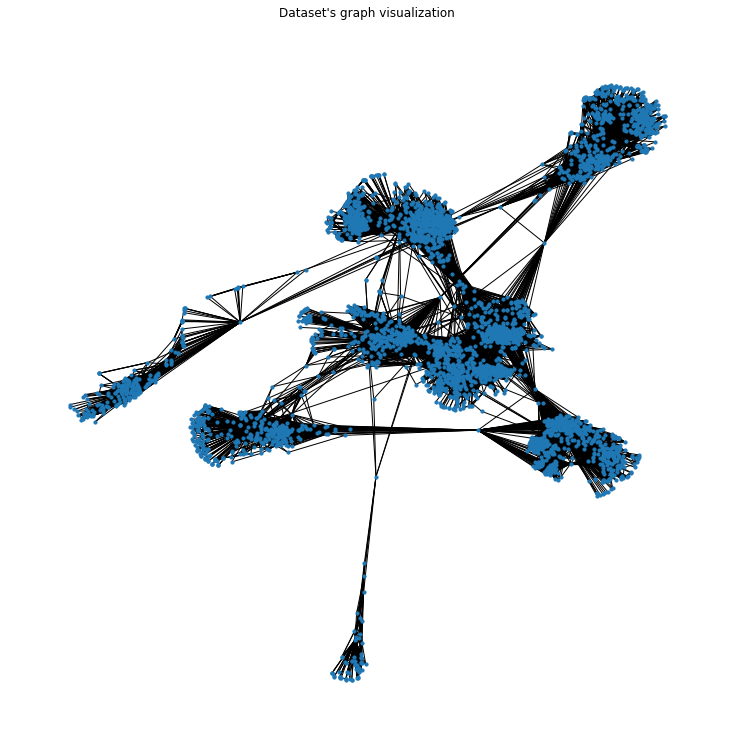

In [6]:
def visualize_graph(graph, directed=False):
    """
    Visualize the graph.
    """
    G = nx.Graph() 

    if directed:
        # Add edges to the directed graph
        for node, neighbors in graph.items():
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
    else:
        print("a")
        # Add edges to the undirected graph, where we can further optimize
        # with tracking edges that are already added to avoid duplicates
        added_edges = set()
        for node, neighbors in graph.items():
            for neighbor in neighbors:
                edge = tuple(sorted((node, neighbor)))
                if edge not in added_edges:
                    G.add_edge(*edge)  
                    added_edges.add(edge)

    # Visualize the graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, node_size=10, with_labels=False)
    plt.title("Dataset's graph visualization")
    plt.show()

visualize_graph(graph)

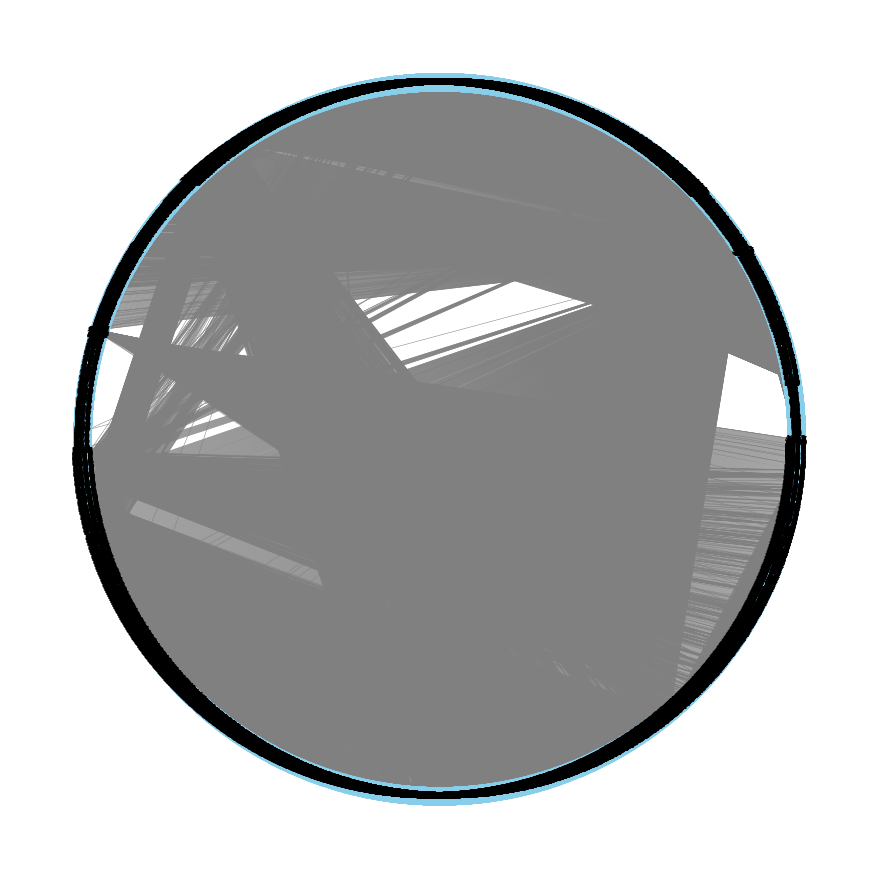

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Read the file with edges (replace 'edges.txt' with your file path)
with open('datasets/facebook_combined.txt', 'r') as file:
    for line in file:
        # Split the line into two nodes (endpoints of the edge)
        node1, node2 = line.strip().split()
        # Add the edge to the graph
        G.add_edge(node1, node2)

# Use a different layout to avoid the scipy issue
pos = nx.circular_layout(G)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray', width=0.5)

# Show the plot
plt.show()
